In [10]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [21]:
def Gaussian_ranks(n=2000,rho=0.2,spear=True):

    """
    Function to create vectors of rank with known rank correlation (Spearman's rho)
        --- Input 
            n: Number of observations desired, default is 2000
            rho: Correlation coefficient. If Spear==False then this parameter enters directly into the covariance matrix, R.
            spear: If True then rho is interpreted as a Spearman rank and rescaled to fit the Gaussian copula.
        --- Output:
            Two uniformly distributed vectors with desired Spearman's rho.        
    """
    
    if spear:
        rho_G = 2*np.sin(rho*np.pi/6)
    else: 
        rho_G = rho
    
    R = np.array([[1,rho_G],
                [rho_G,1]])
    
    C = norm.cdf(np.random.multivariate_normal([0,0],R,size=n))
    U,V = C[:,0],C[:,1]
    
    return U,V

def get_data(rho):
    U,V = Gaussian_ranks(n=10000,rho=rho,spear=True)
    U_p = (U*100).round(0)/100
    V_mean = pd.Series(V).groupby(U_p).mean()
    return U,V,V_mean


Construct plots for different values of Spearman's $\rho$:

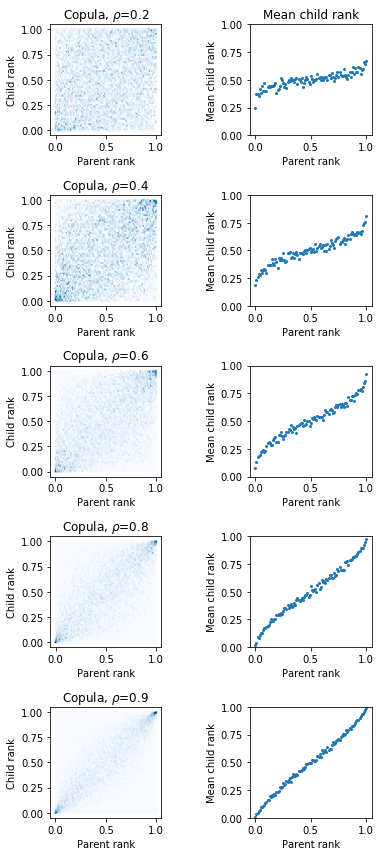

In [22]:

rho_list = [0.2,0.4,0.6,0.8,.9]

fig,axes = plt.subplots(len(rho_list),2,figsize=(6,12))

axes[0,1].set_title('Mean child rank')
for idx,rho in enumerate(rho_list):
    U,V,V_mean = get_data(rho)
    axes[idx,0].set_title(r'Copula, $\rho$=%.1f'%rho)
    axes[idx,0].hexbin(x=U,y=V,cmap='Blues')
    axes[idx,0].set_aspect('equal')
    

    axes[idx,1].plot(V_mean,lw=0,marker='o',ms=2)
    

    axes[idx,0].set_xlabel('Parent rank')
    axes[idx,0].set_ylabel('Child rank')
    axes[idx,1].set_xlabel('Parent rank')
    axes[idx,1].set_ylabel('Mean child rank')
    axes[idx,1].set_yticks(axes[idx,0].get_yticks())
    axes[idx,1].set_ylim(0,1)
    axes[idx,1].set_aspect('equal')
fig.tight_layout()
#fig.savefig('Mean rank dependency with Gaussian copulas.png',dpi=400)
